In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("../../data/raw/production_revenue.csv")
df["date"] = pd.to_datetime(df["date"], format="%b-%Y")


In [3]:
display(df.head(3))
print(f"\n🔍 Dimensions: {df.shape}")
print(f"📅 Period: {df['date'].min()} a {df['date'].max()}")

,date,cheese_revenue,milk_revenue,dulce_leche_revenue,eggs_revenue,porks_revenue,vegetables_revenue
0,2020-01-01,300,900,50,12,300,20
1,2020-02-01,375,930,30,24,300,24
2,2020-03-01,420,960,40,60,300,36



🔍 Dimensions: (60, 7)
📅 Period: 2020-01-01 00:00:00 a 2024-12-01 00:00:00


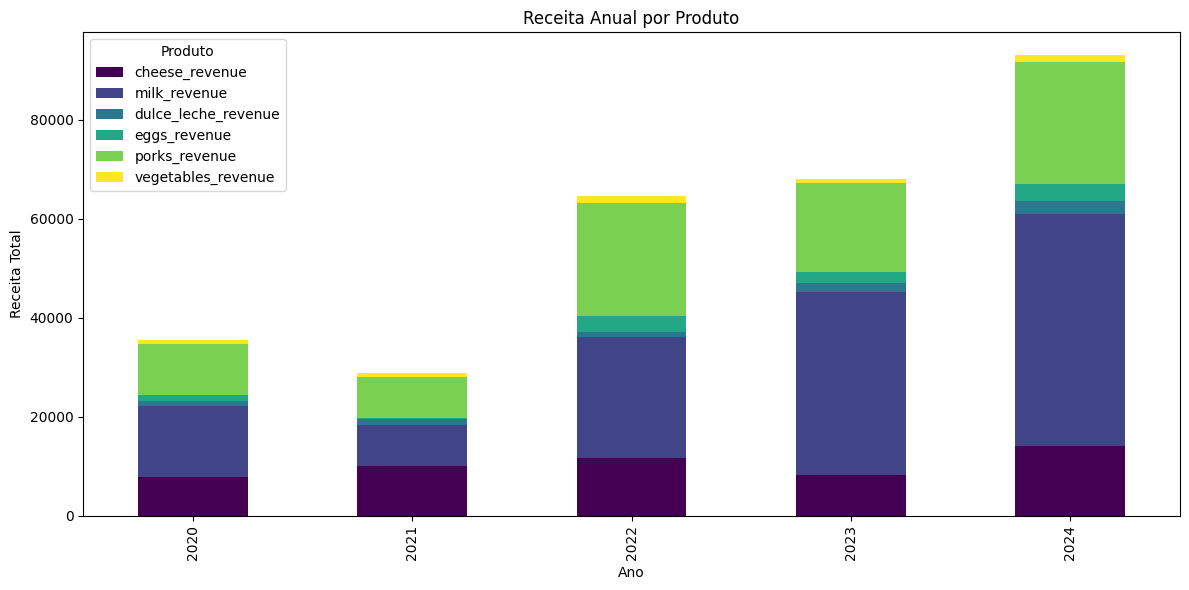

In [4]:
products = df.columns[1:]
df['year'] = df['date'].dt.year
annual_revenue = df.groupby("year")[products].sum()

annual_revenue.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Receita Anual por Produto')
plt.xlabel('Ano')
plt.ylabel('Receita Total')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

In [5]:
df = df.drop(columns="year")

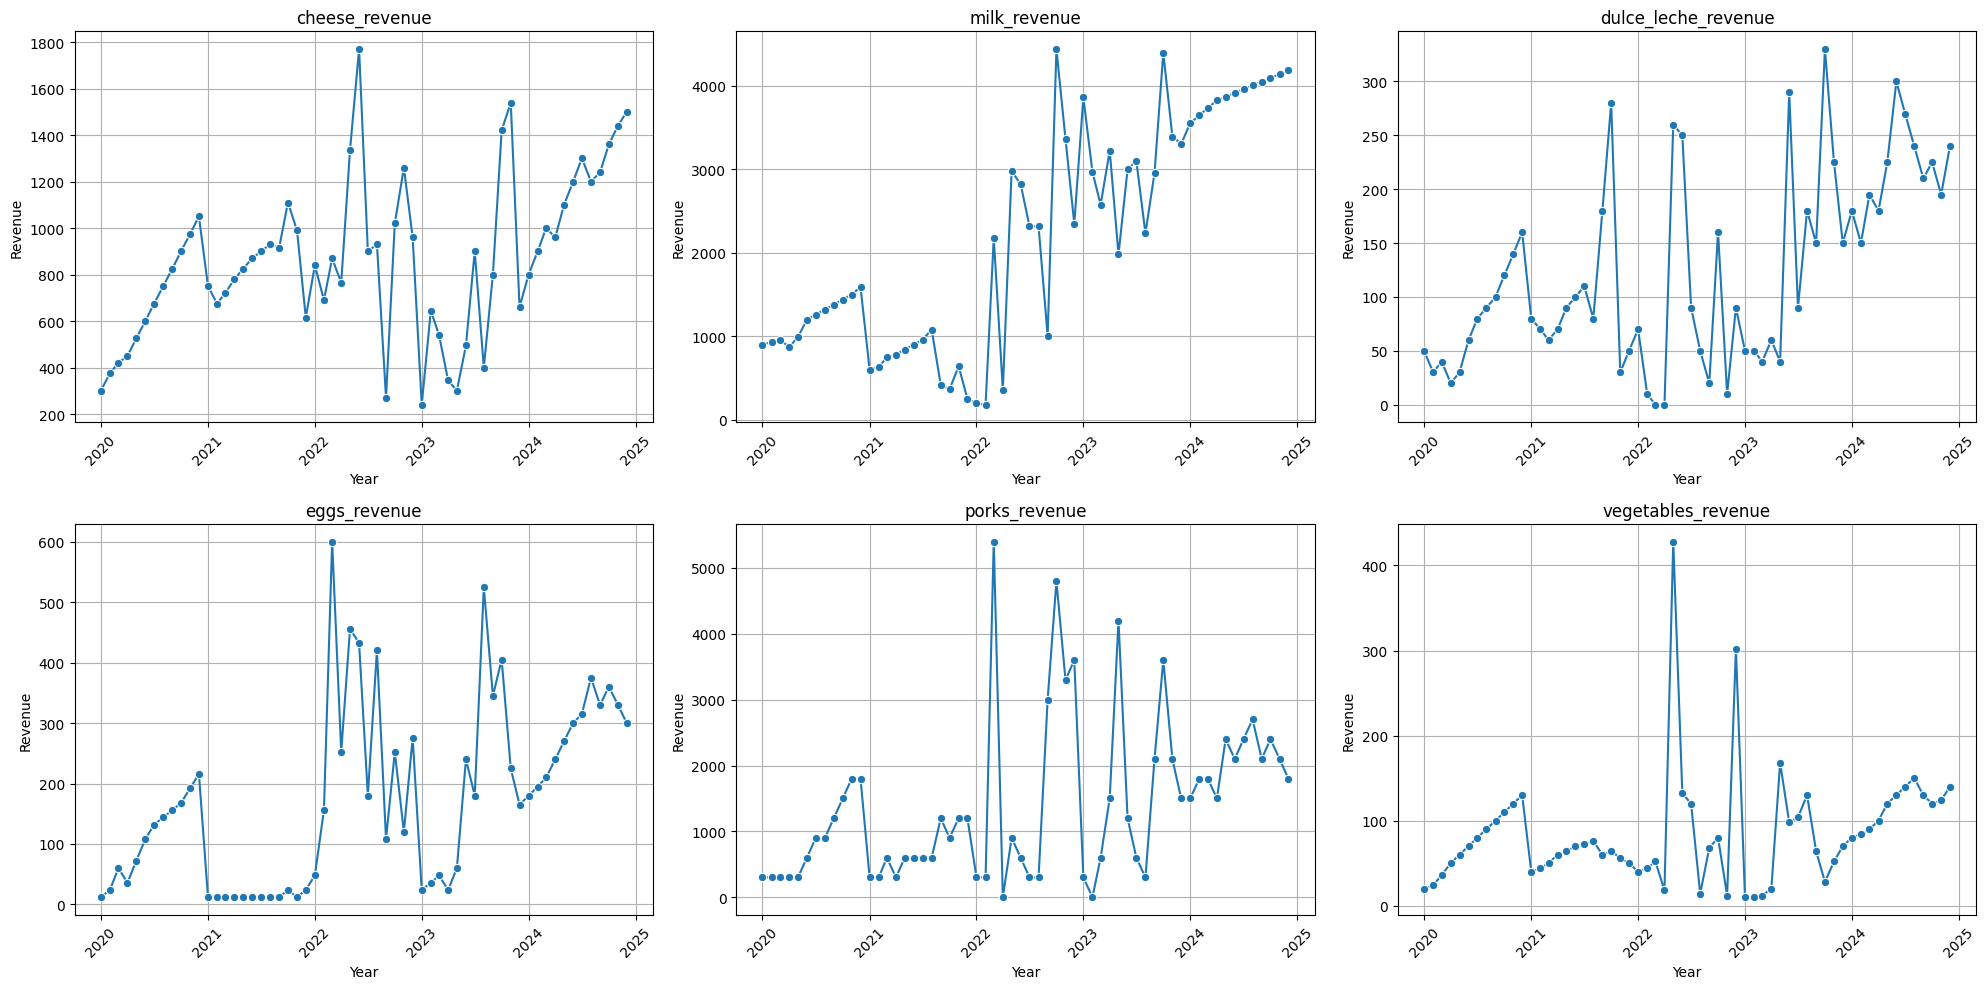

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.flatten()

for i, product in enumerate(products):
    ax = axes[i]
    sns.lineplot(data=df, x = "date", y=product, marker="o", ax=ax)
    ax.set_title(product)
    ax.set_xlabel("Year")
    ax.set_ylabel("Revenue")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

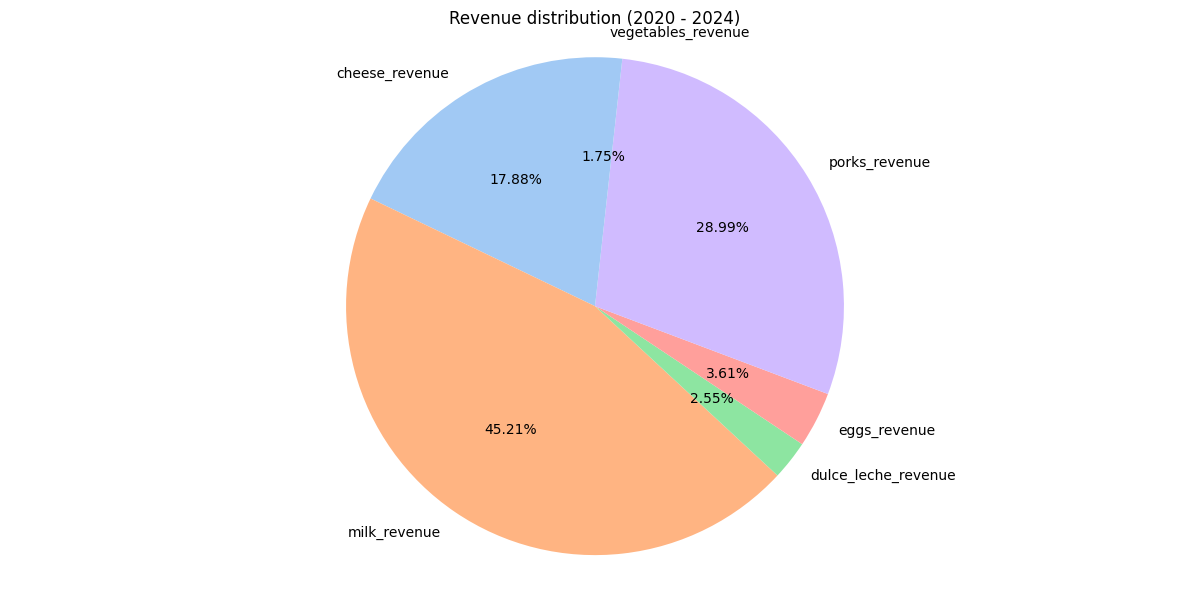

In [7]:
revenue_totals = df.iloc[:, 1:].sum()
labels = revenue_totals.index.tolist()
values = revenue_totals.values.tolist()

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors
)
plt.title("Revenue distribution (2020 - 2024)")
plt.axis("equal")
plt.tight_layout()
plt.show()

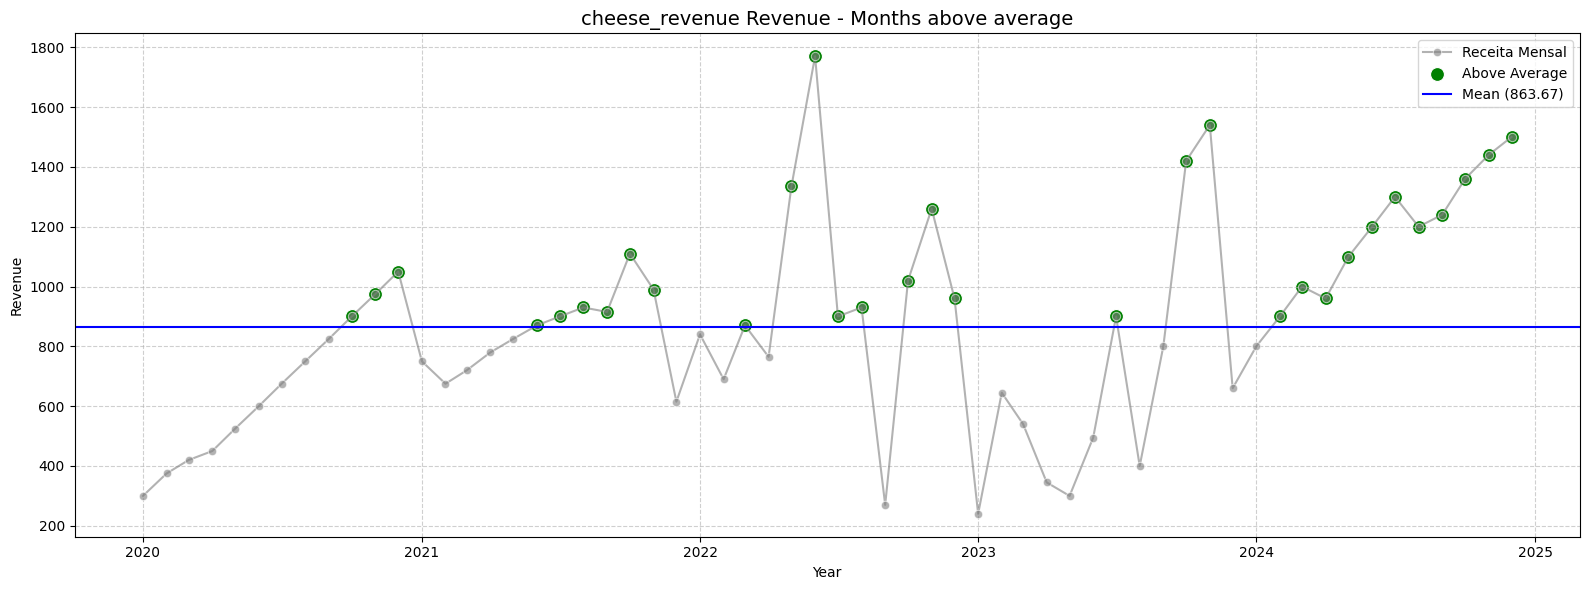

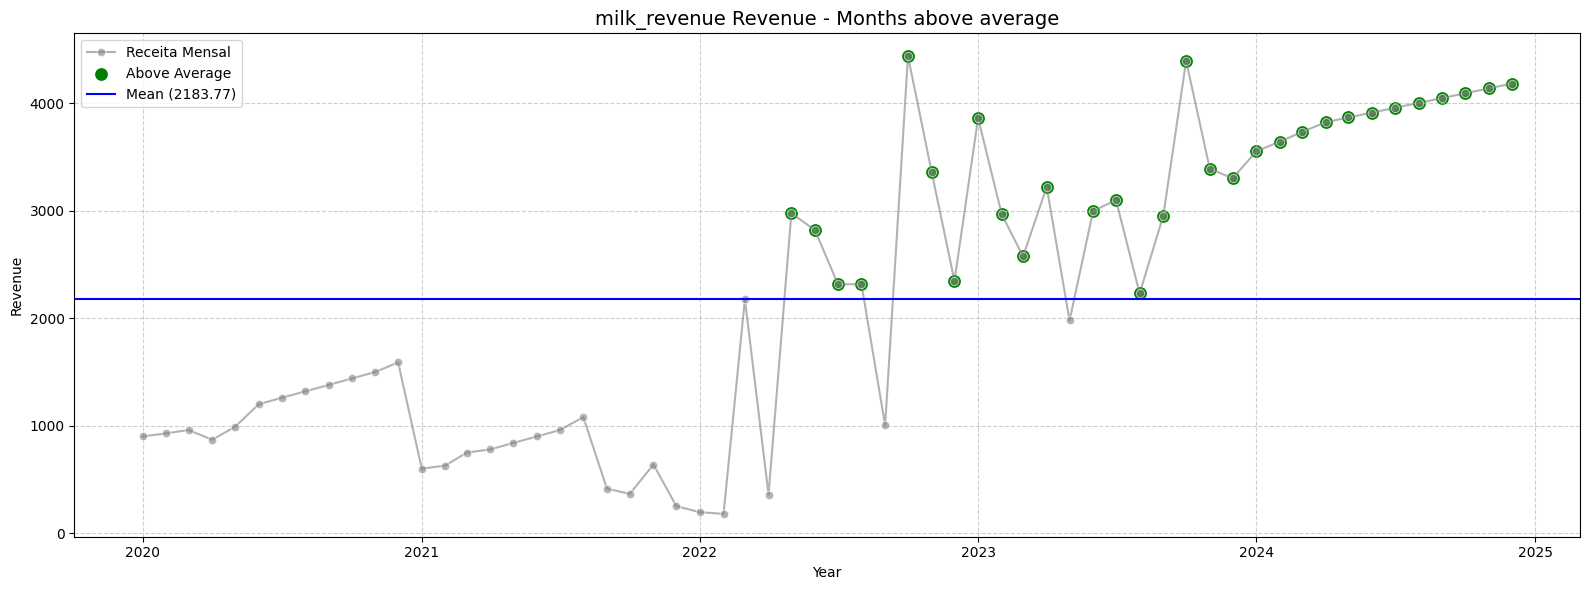

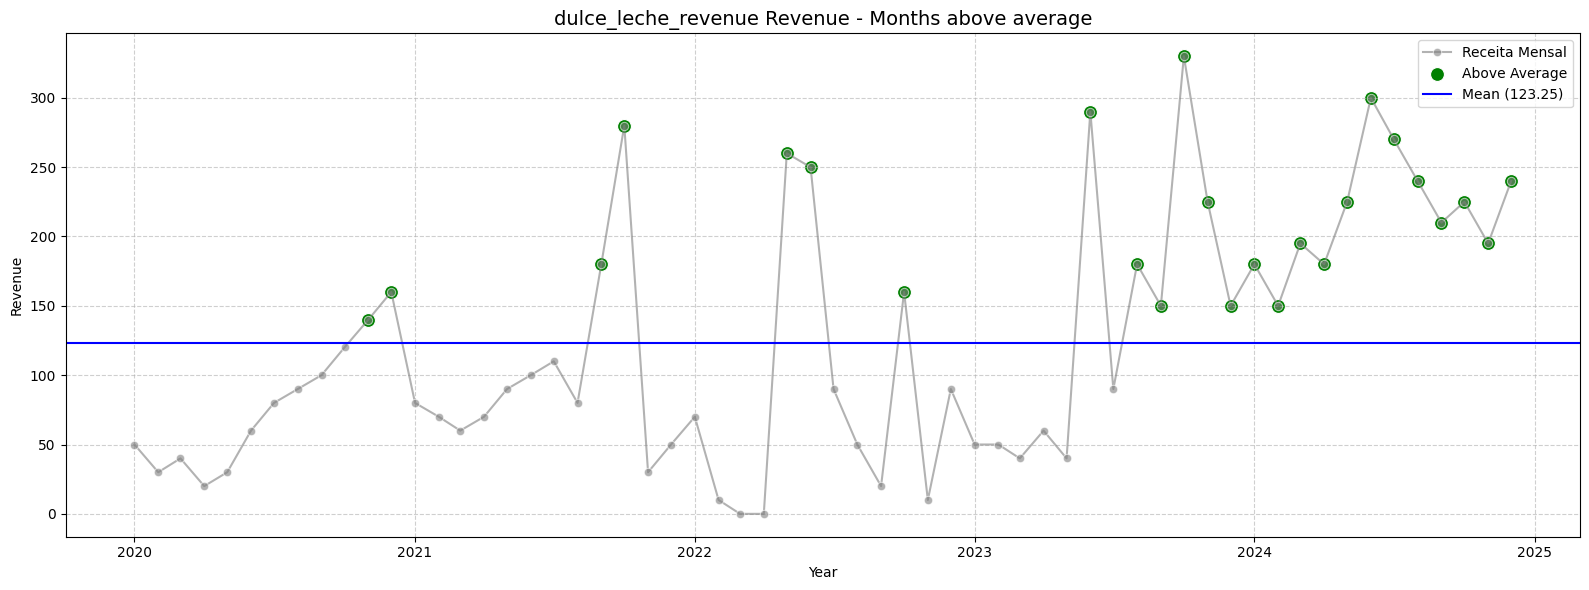

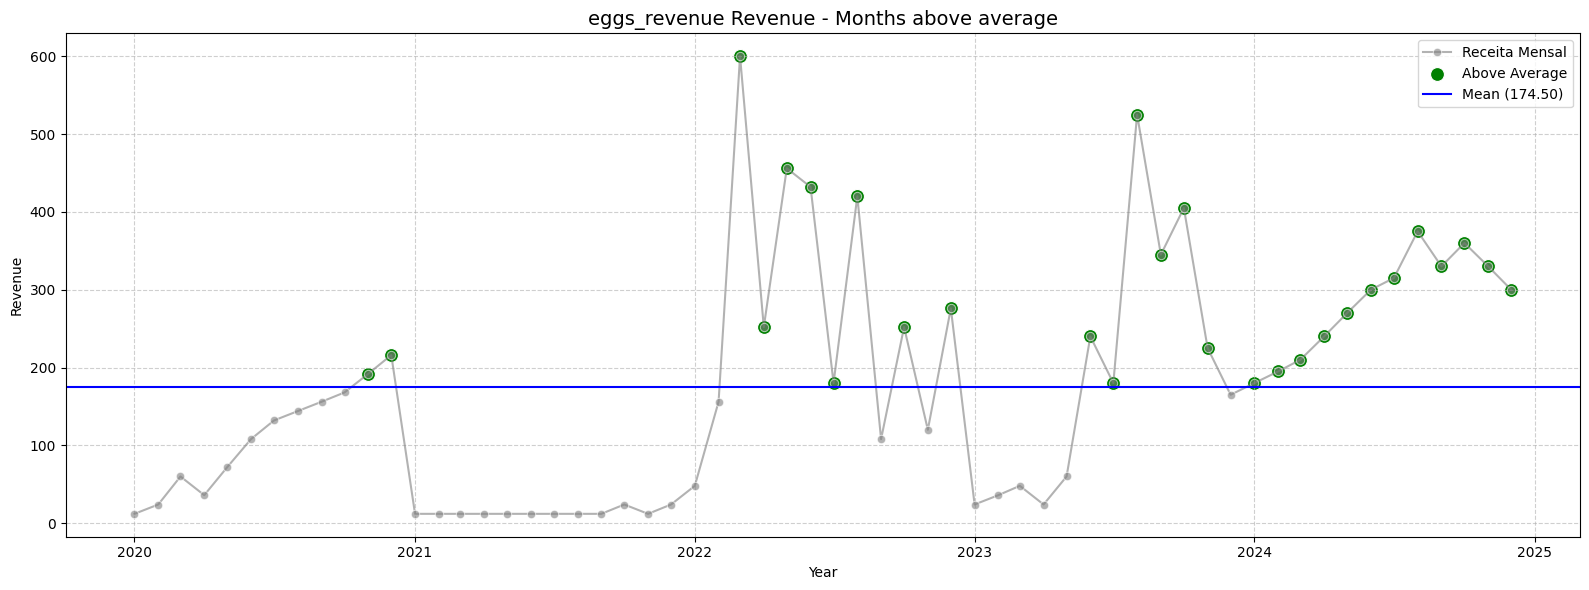

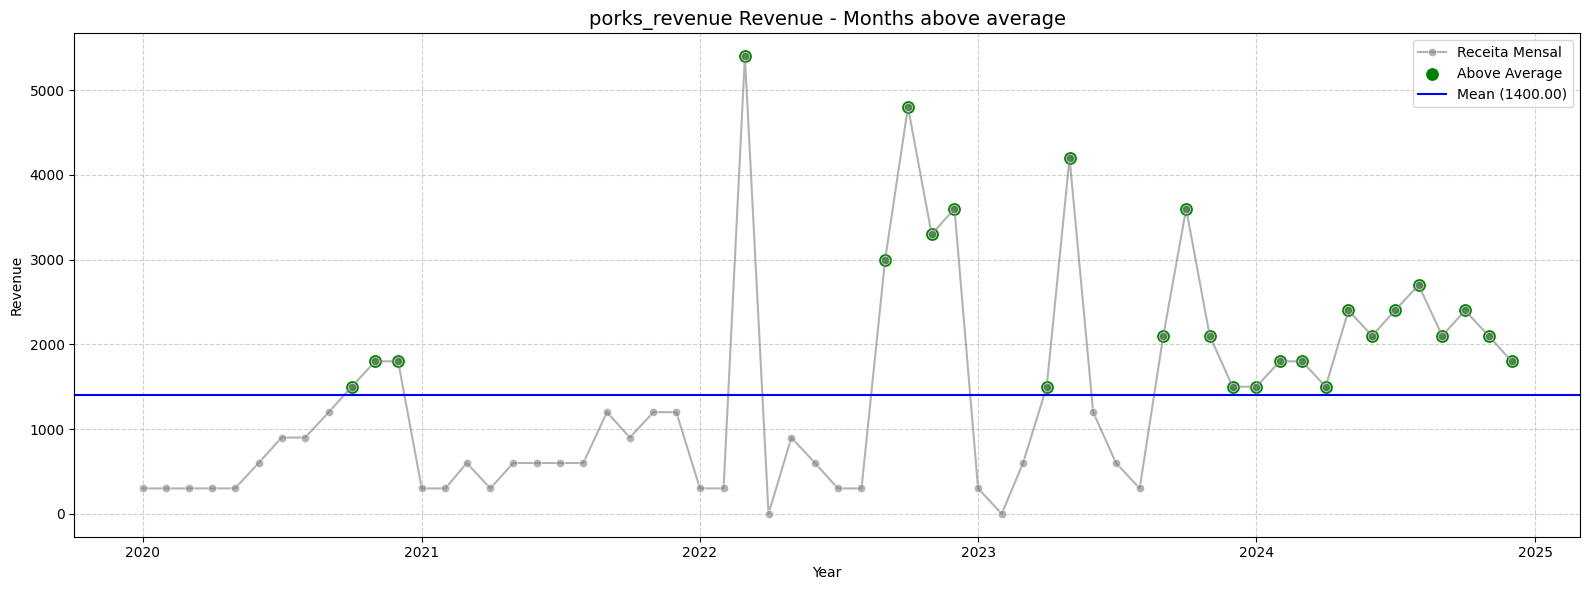

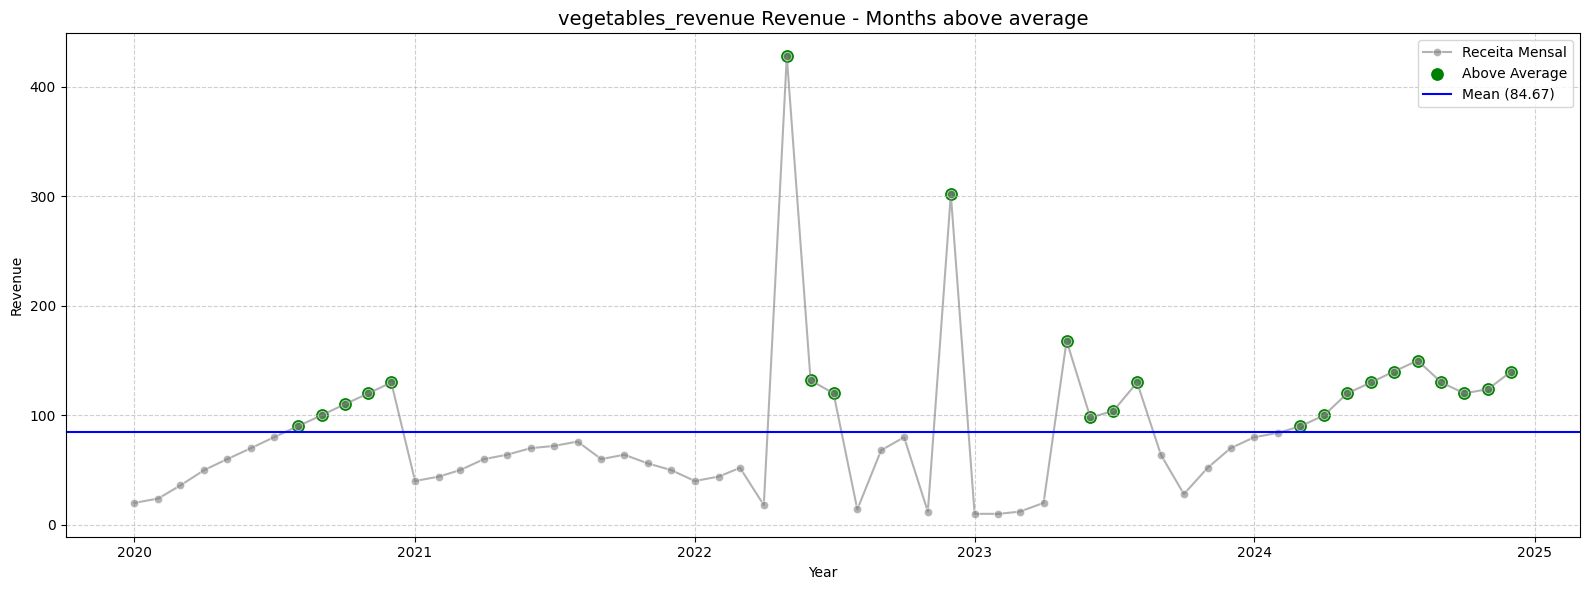

In [8]:
for product in products:
    
    mean = df[product].mean()
    
    plt.figure(figsize=(16, 6))
    
    sns.lineplot(
        data=df,
        x='date',
        y=product,
        marker='o',
        label='Receita Mensal',
        color='gray',
        alpha=0.6
    )
    above_avg = df[df[product] > mean]
    sns.scatterplot(
        data=above_avg,
        x='date',
        y=product,
        color='green',
        marker='o',
        s=100,
        label='Above Average'
    )

    plt.axhline(mean, color='blue', linestyle='-', label=f'Mean ({mean:.2f})')
        
    plt.title(f'{product} Revenue - Months above average', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.show()

Text(0.5, 1.0, 'Products Correlation')

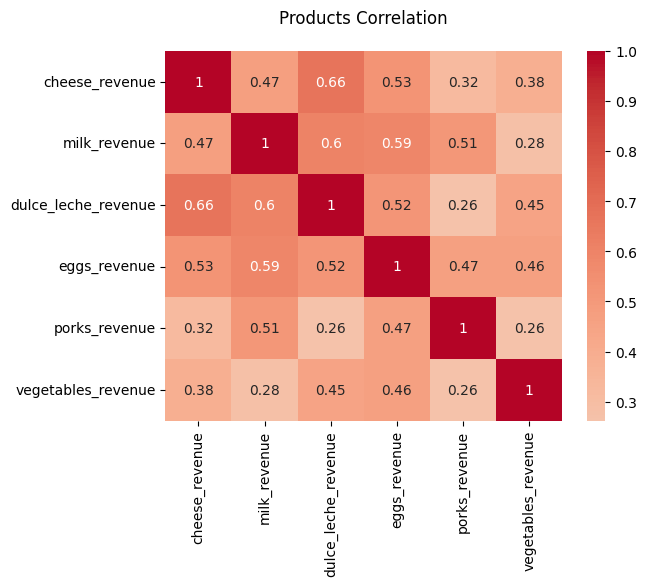

In [9]:
cols_corr = ["cheese_revenue", "milk_revenue", "dulce_leche_revenue", "eggs_revenue", "porks_revenue", "vegetables_revenue"]
sns.heatmap(df[cols_corr].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Products Correlation', pad=20)

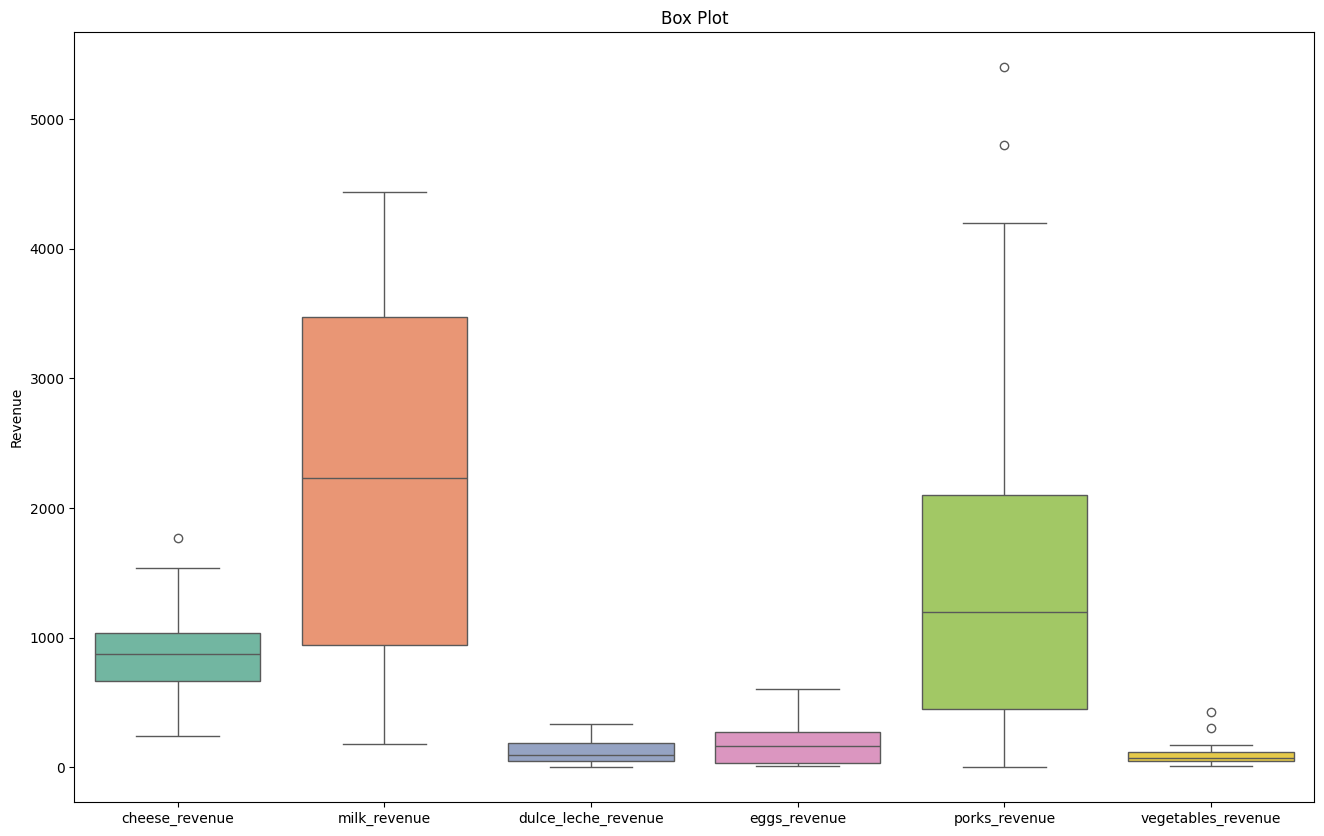

In [10]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df[1:], palette="Set2")
plt.title("Box Plot")
plt.ylabel("Revenue")
plt.show()


Outlier Analysis - Column: 'cheese_revenue'
• 1st Quartile (Q1): 656.25
• 3rd Quartile (Q3): 1027.50
• IQR: 371.25
• Lower Bound: 99.38
• Upper Bound: 1584.38
• Outliers Detected: 1


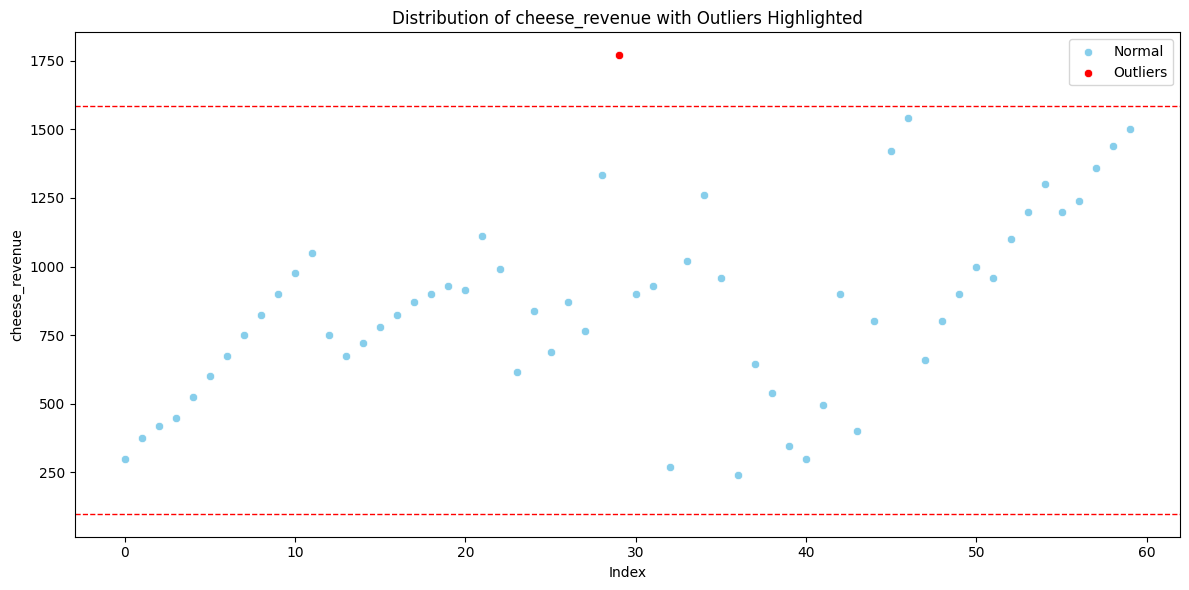


Outlier Analysis - Column: 'milk_revenue'
• 1st Quartile (Q1): 922.50
• 3rd Quartile (Q3): 3433.50
• IQR: 2511.00
• Lower Bound: -2844.00
• Upper Bound: 7200.00
• Outliers Detected: 0


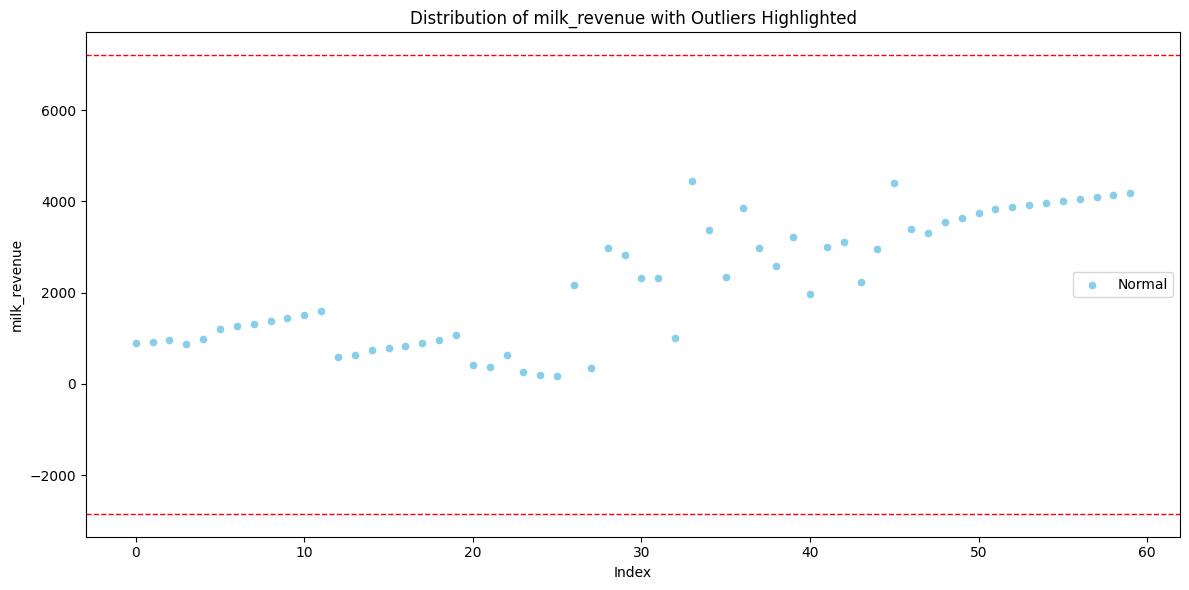


Outlier Analysis - Column: 'dulce_leche_revenue'
• 1st Quartile (Q1): 50.00
• 3rd Quartile (Q3): 183.75
• IQR: 133.75
• Lower Bound: -150.62
• Upper Bound: 384.38
• Outliers Detected: 0


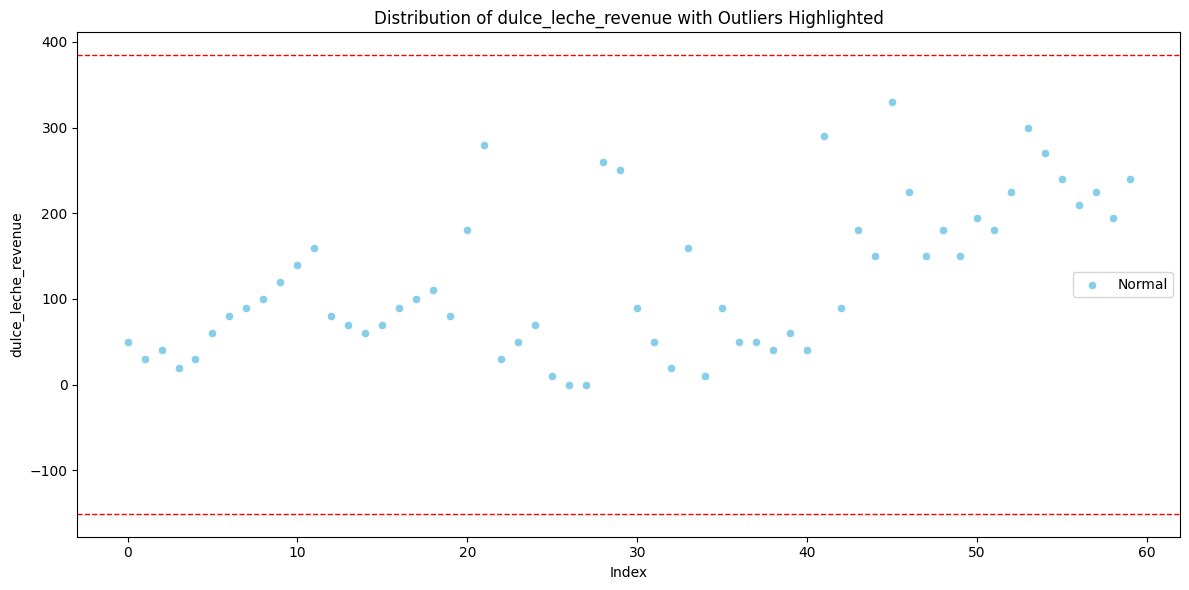


Outlier Analysis - Column: 'eggs_revenue'
• 1st Quartile (Q1): 24.00
• 3rd Quartile (Q3): 271.50
• IQR: 247.50
• Lower Bound: -347.25
• Upper Bound: 642.75
• Outliers Detected: 0


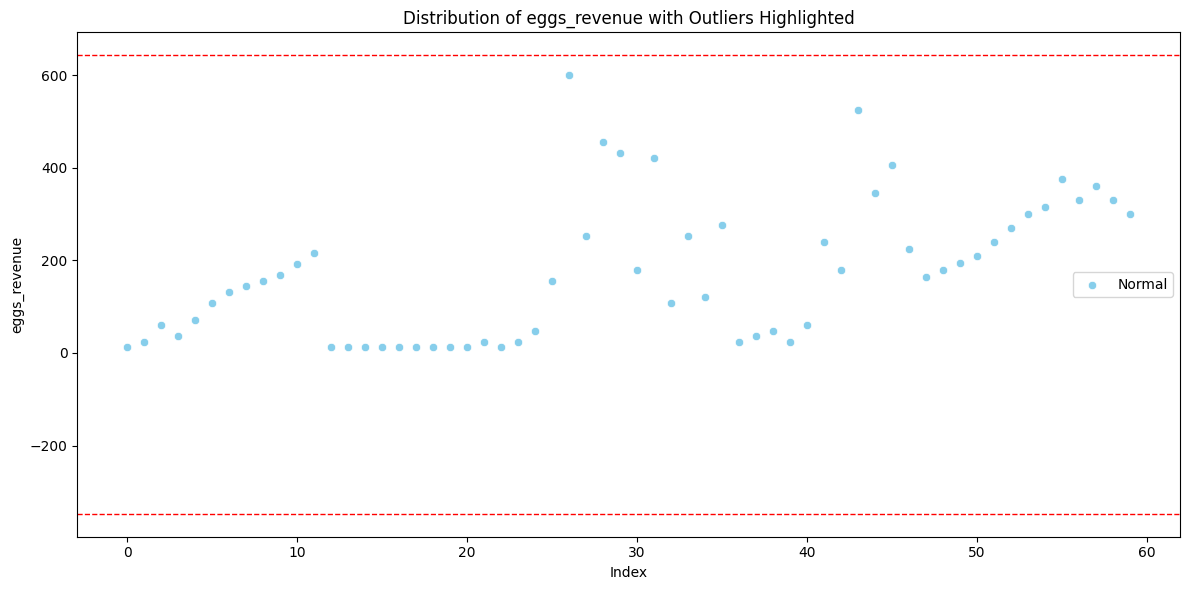


Outlier Analysis - Column: 'porks_revenue'
• 1st Quartile (Q1): 300.00
• 3rd Quartile (Q3): 2100.00
• IQR: 1800.00
• Lower Bound: -2400.00
• Upper Bound: 4800.00
• Outliers Detected: 1


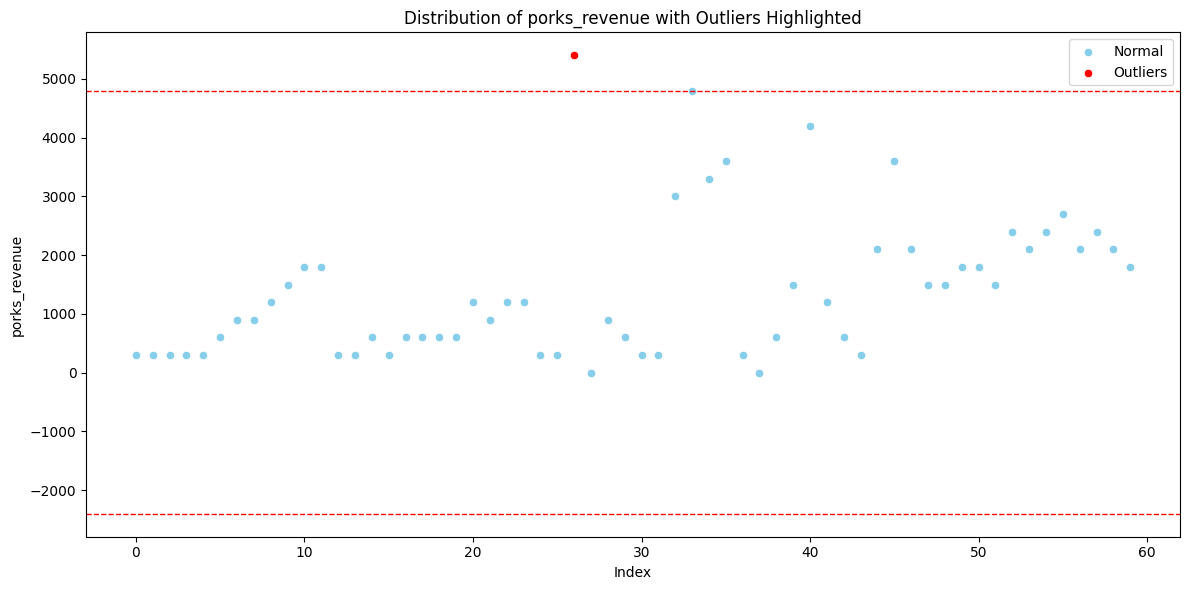


Outlier Analysis - Column: 'vegetables_revenue'
• 1st Quartile (Q1): 48.50
• 3rd Quartile (Q3): 120.00
• IQR: 71.50
• Lower Bound: -58.75
• Upper Bound: 227.25
• Outliers Detected: 2


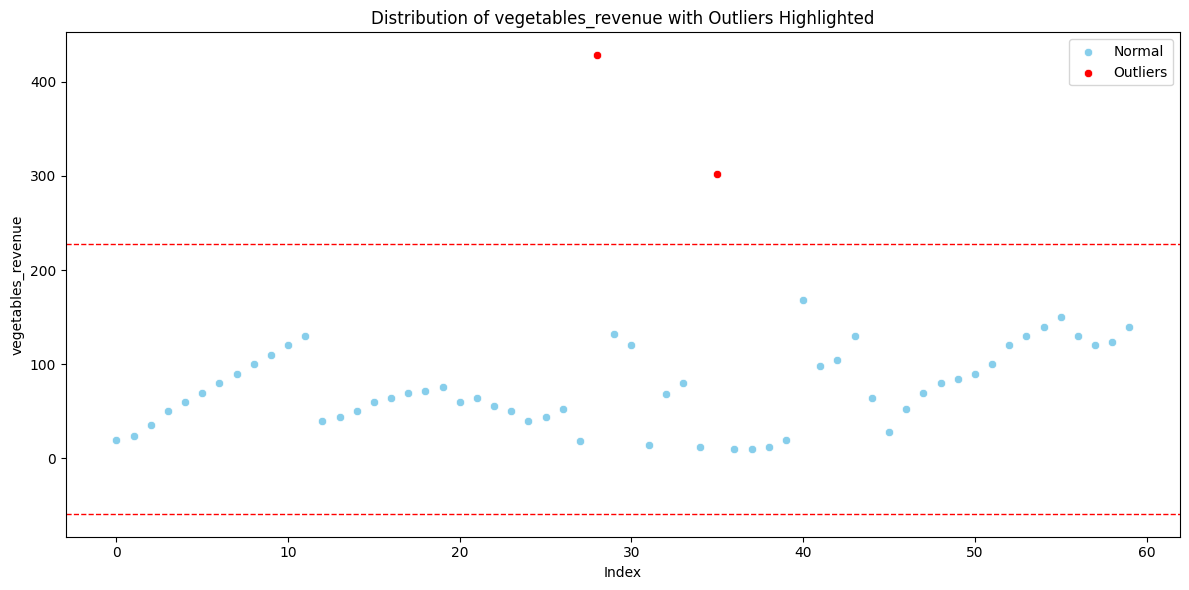

In [11]:
for product in products:
    Q1 = df[product].quantile(0.25)
    Q3 = df[product].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = ((df[product] < lower_bound) | (df[product] > upper_bound))
    outliers_df = df[outliers_mask].copy()
    non_outliers_df = df[~outliers_mask].copy()

    
    print(f"\nOutlier Analysis - Column: '{product}'")
    print(f"• 1st Quartile (Q1): {Q1:.2f}")
    print(f"• 3rd Quartile (Q3): {Q3:.2f}")
    print(f"• IQR: {IQR:.2f}")
    print(f"• Lower Bound: {lower_bound:.2f}")
    print(f"• Upper Bound: {upper_bound:.2f}")
    print(f"• Outliers Detected: {len(outliers_df)}")

    
    plt.figure(figsize=(12, 6))

    sns.scatterplot(x=non_outliers_df.index, y=non_outliers_df[product], color='skyblue', label='Normal')
    
    sns.scatterplot(x=outliers_df.index, y=outliers_df[product], color='red', label='Outliers')

    plt.axhline(y=upper_bound, color="red", linestyle="--", linewidth=1)
    plt.axhline(y=lower_bound, color="red", linestyle="--", linewidth=1)

    plt.title(f"Distribution of {product} with Outliers Highlighted")
    plt.xlabel("Index")
    plt.ylabel(product)
    plt.legend()
    plt.tight_layout()
    plt.show()

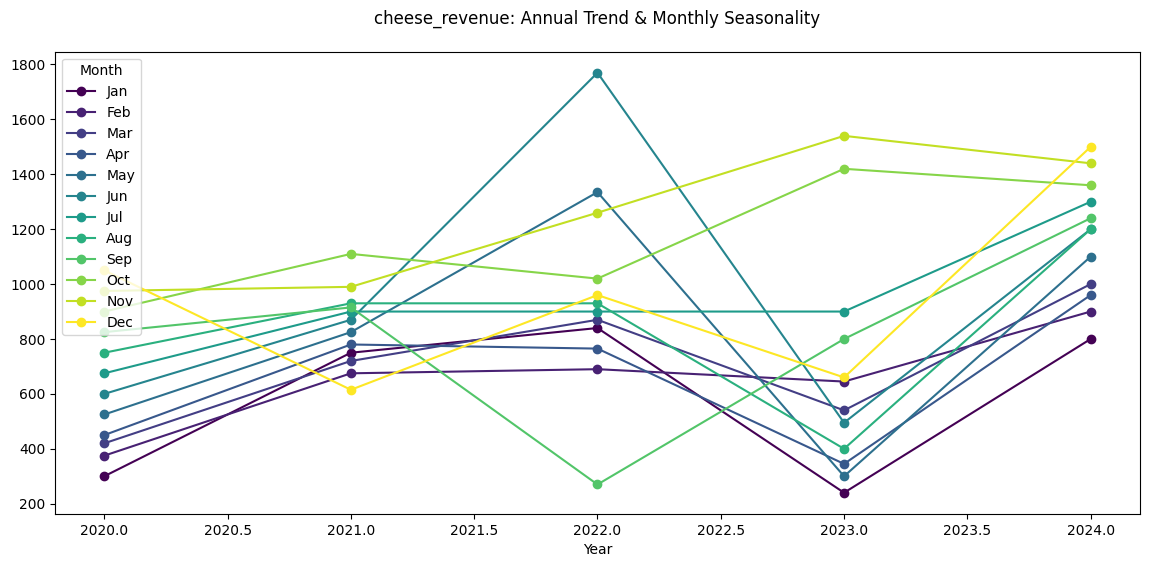

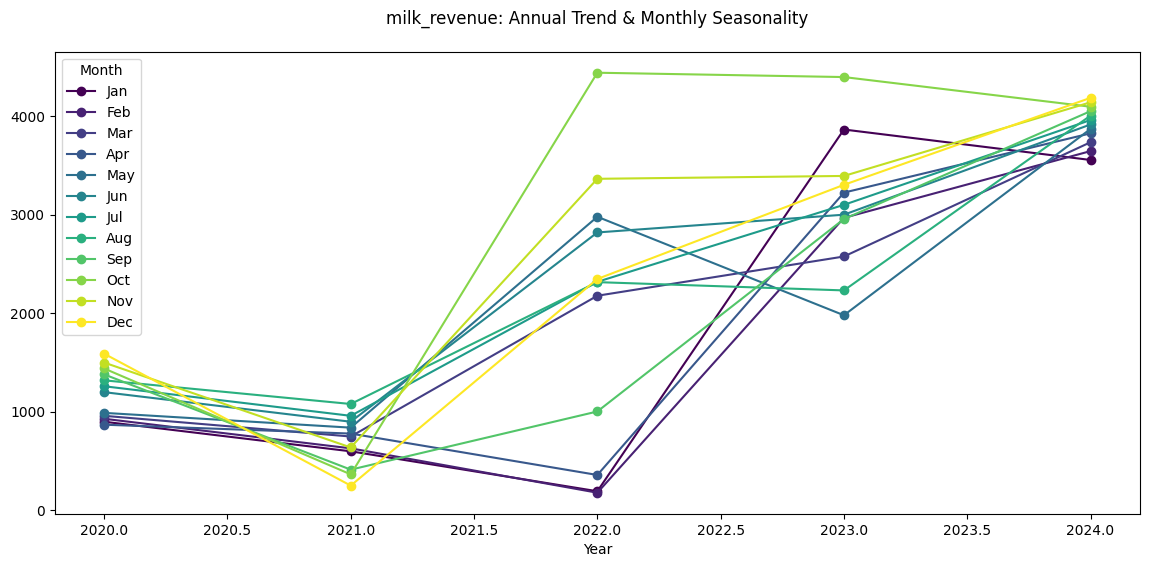

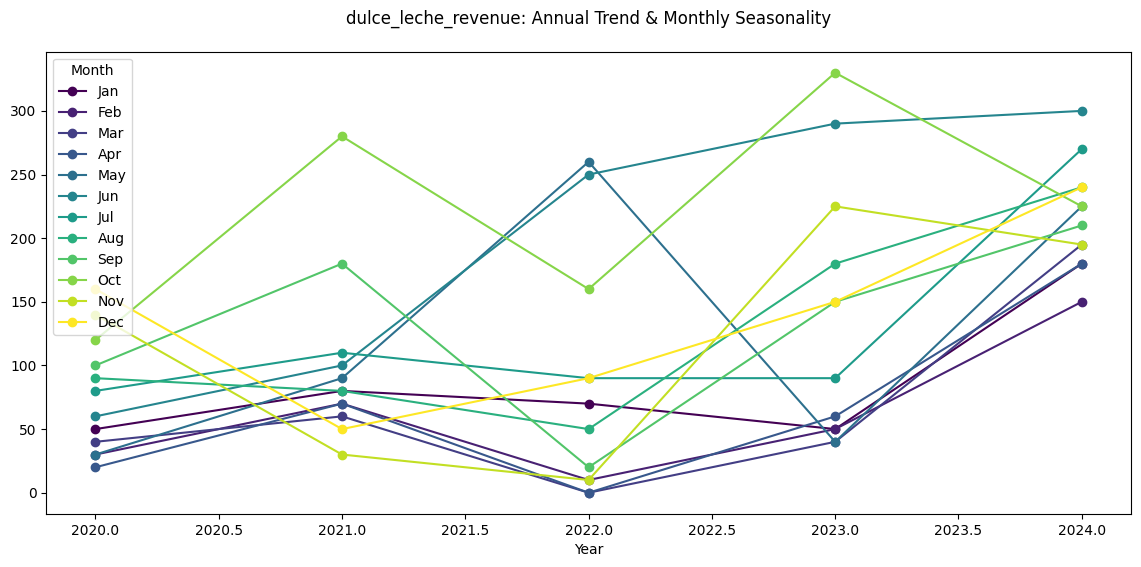

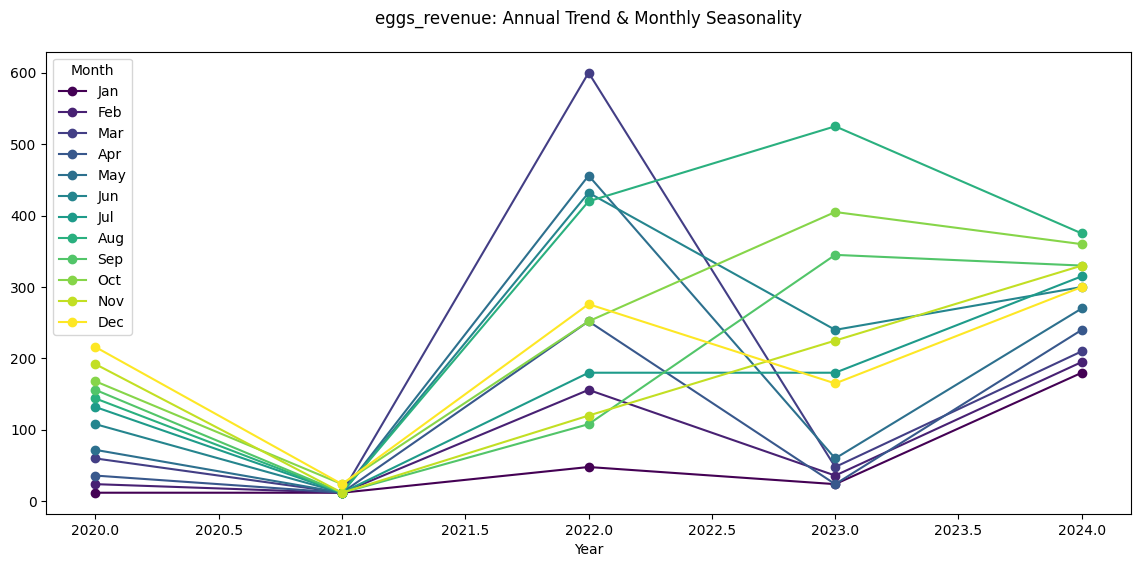

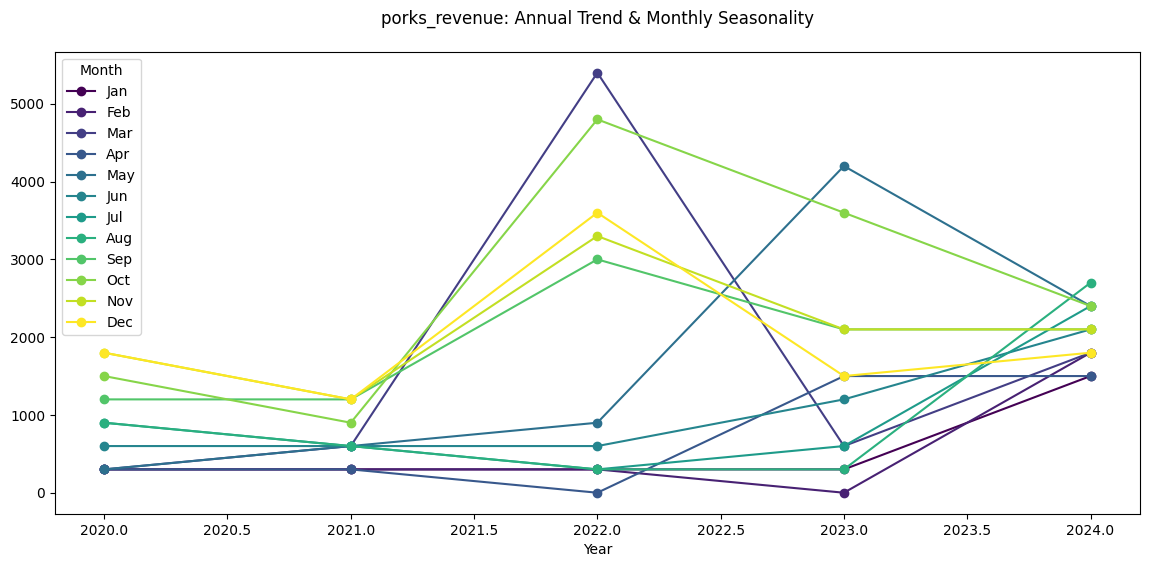

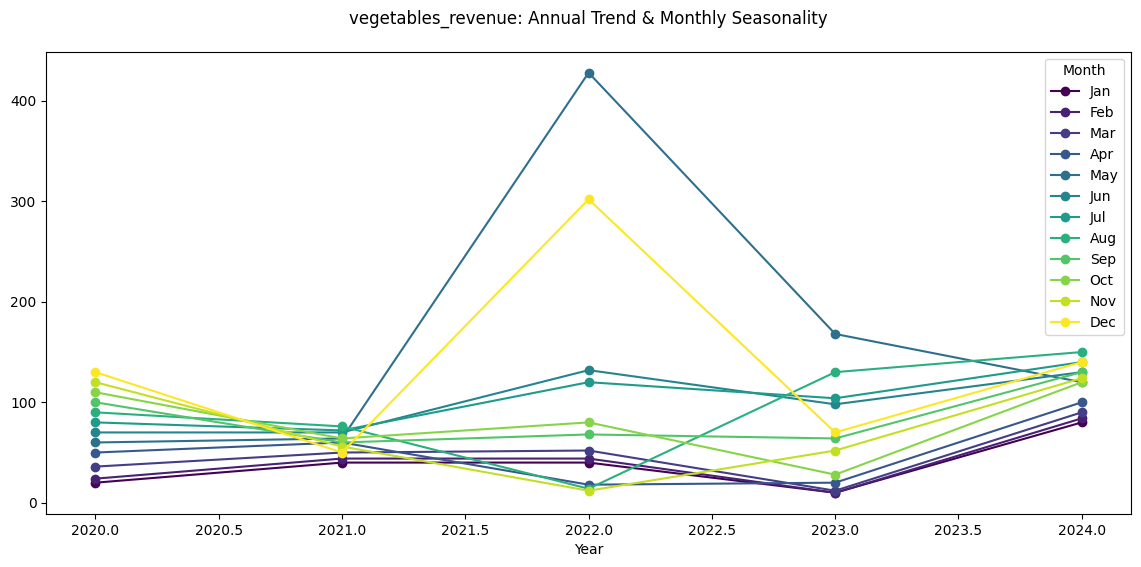

In [12]:
for product in products:   
    month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, ax = plt.subplots(figsize=(14, 6))
    pivot = df.groupby([df['date'].dt.year, df['date'].dt.month])[product].mean().unstack()
    pivot.columns = month_names
    pivot.plot(ax=ax, cmap='viridis', marker='o')

    ax.set_title(f'{product}: Annual Trend & Monthly Seasonality', pad=20)
    ax.set_xlabel('Year')
    plt.legend(title='Month');

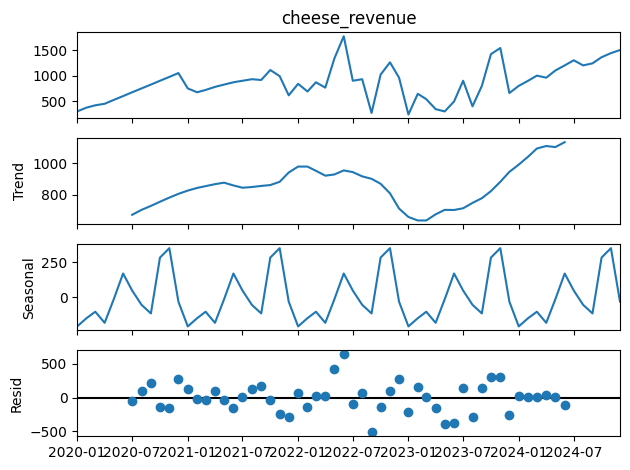

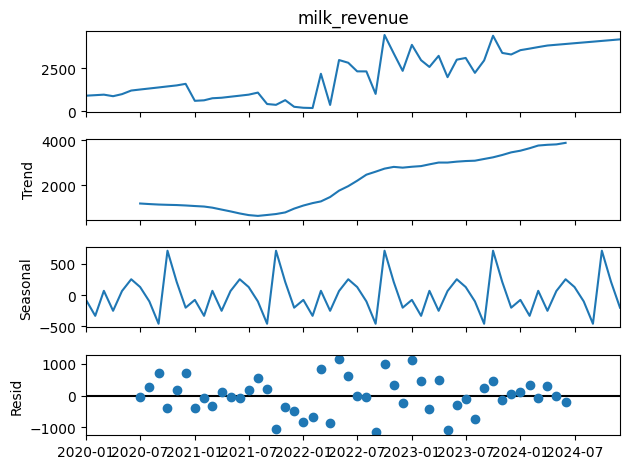

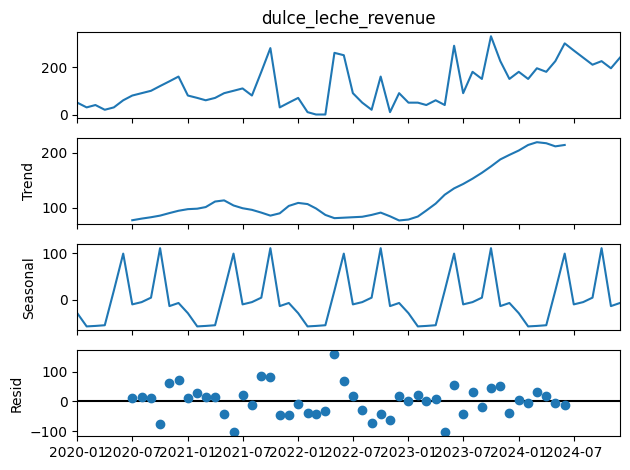

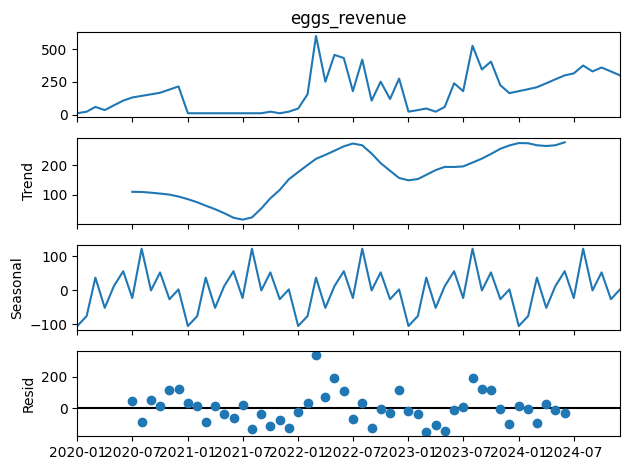

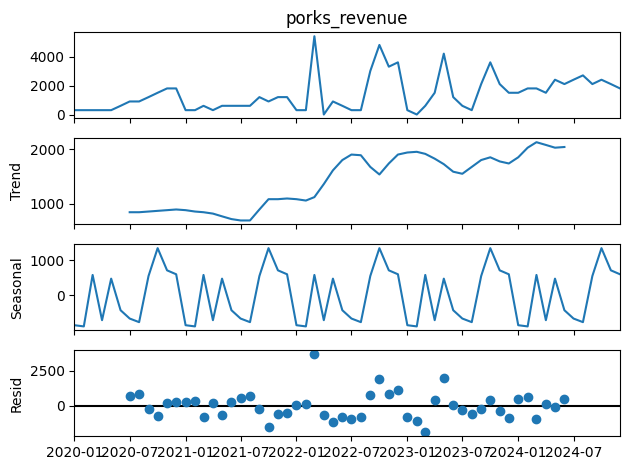

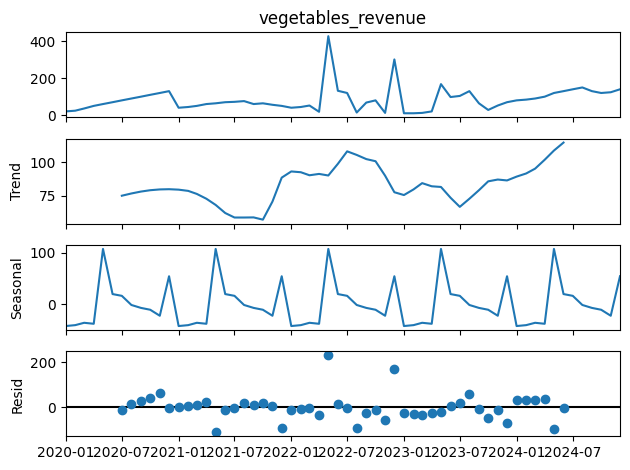

In [13]:
for product in products:
    result = seasonal_decompose(df.set_index('date')[product], model='additive', period=12)
    result.plot()



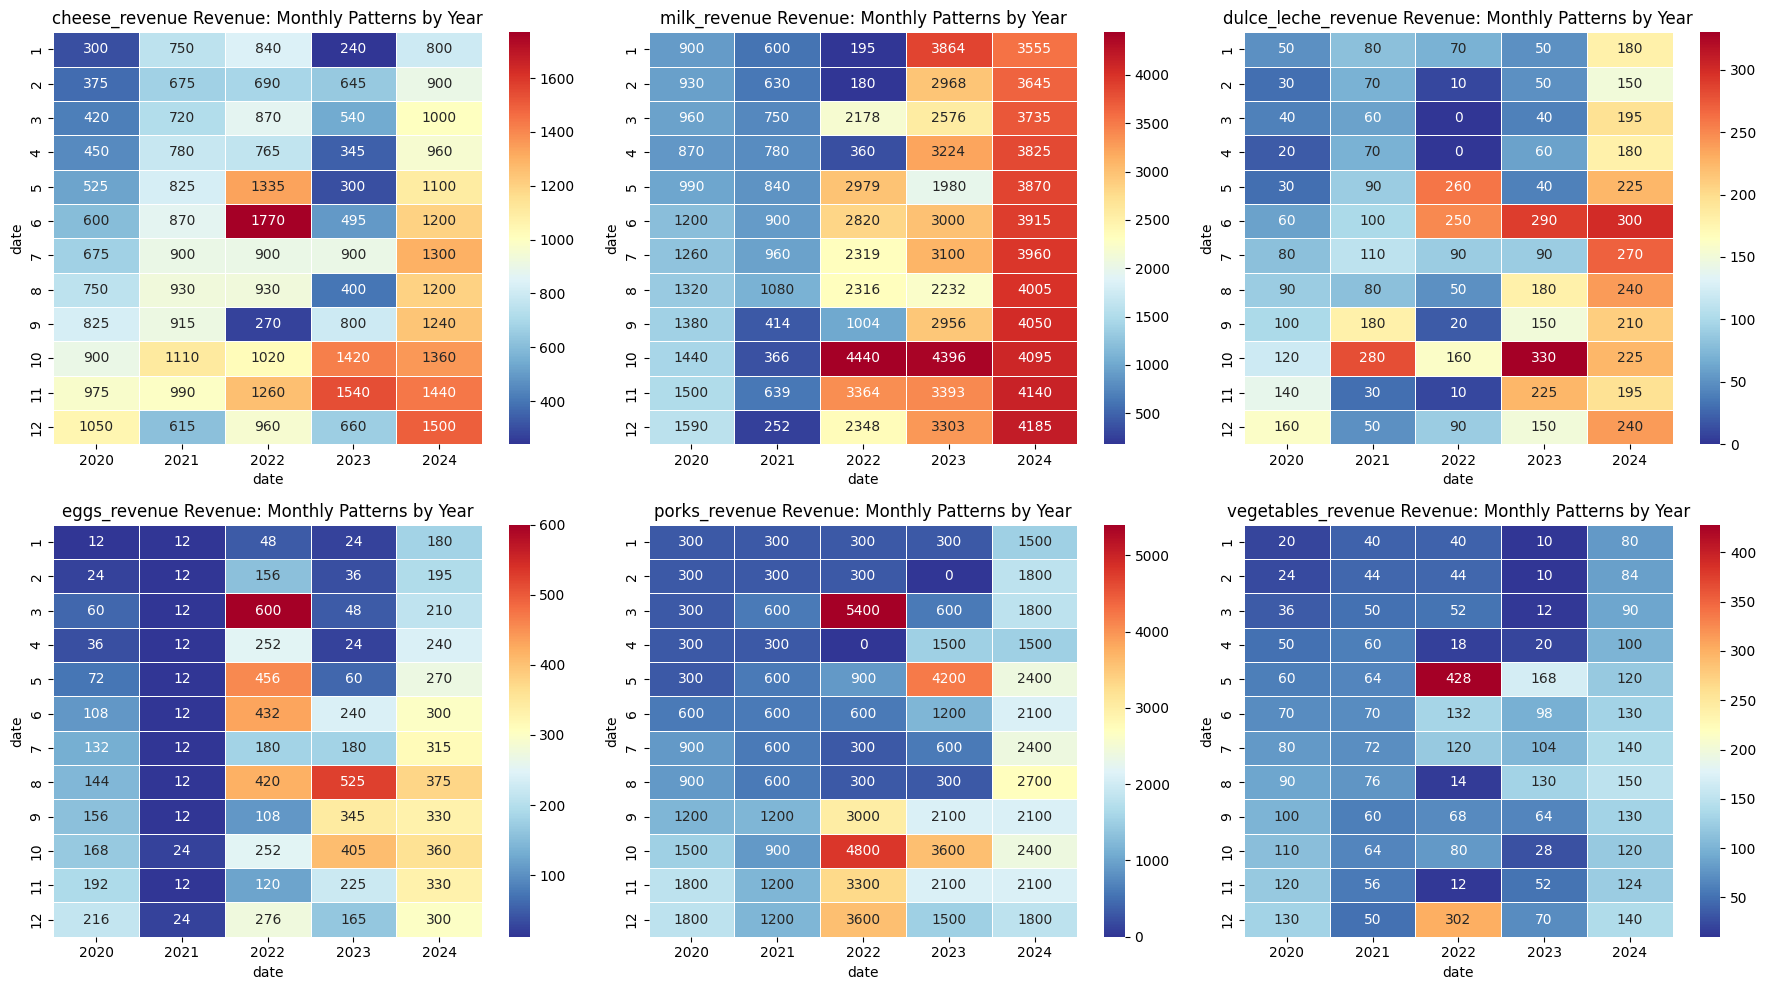

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, product in enumerate(products):
    ax = axes[i]
    pivot = df.pivot_table(index = df["date"].dt.month,
                           columns = df["date"].dt.year,
                           values = product
                           )
    
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlBu_r", linewidths=.5, ax=ax)
    ax.set_title(f"{product} Revenue: Monthly Patterns by Year")

plt.tight_layout()
plt.show()

In [15]:
df["season"] = df['date'].dt.month.map({
    1: 'Summer', 2: 'Summer', 3: 'Summer',
    4: 'Fall', 5: 'Fall', 6: 'Fall',
    7: 'Winter', 8: 'Winter', 9: 'Winter',
    10: 'Spring', 11: 'Spring', 12: 'Spring'
})

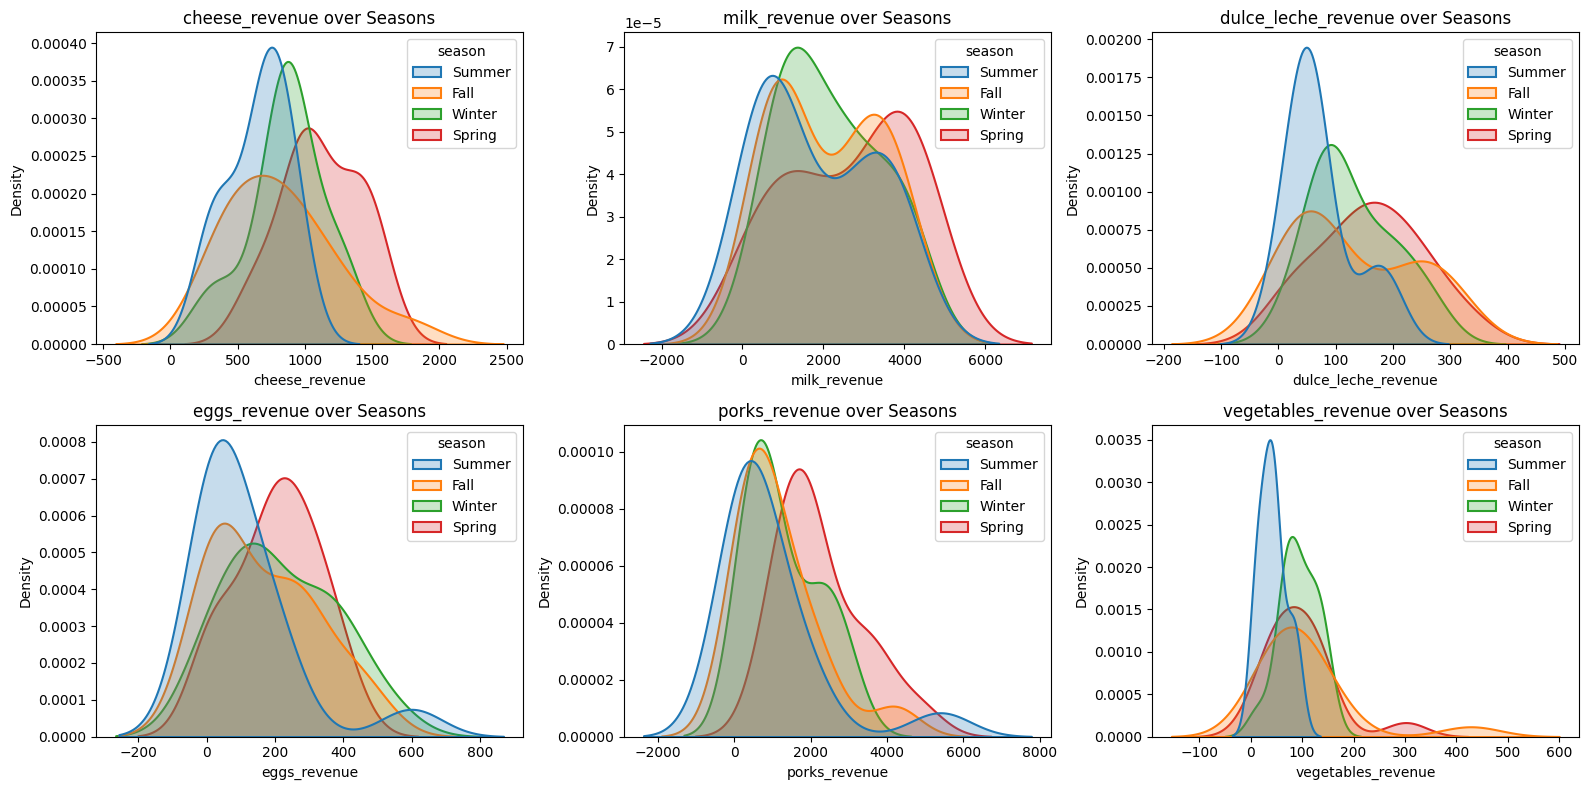

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, product in enumerate(products):
    ax = axes[i]
    sns.kdeplot(data=df, x=product, hue="season", fill=True, linewidth=1.5, ax=ax)
    ax.set_title(f"{product} over Seasons")

for j in range(len(products), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

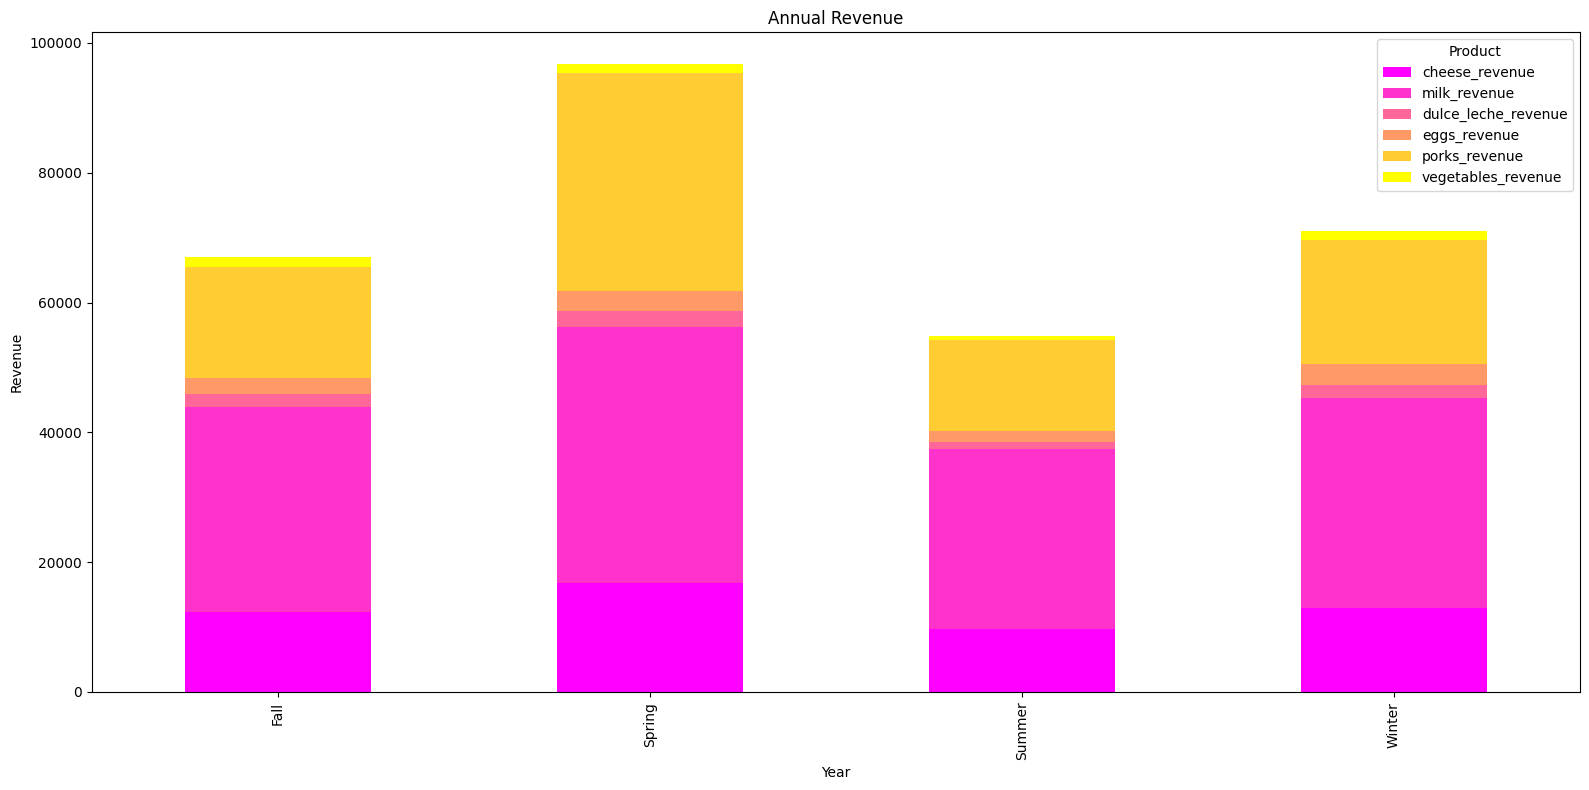

In [17]:
annual_revenue = df.groupby("season")[products].sum()

annual_revenue.plot(kind="bar", stacked=True, figsize=(16, 8), colormap='spring')
plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(title="Product")
plt.tight_layout()
plt.show()

In [18]:
df = df.drop(columns="season")
df.head(2)

,date,cheese_revenue,milk_revenue,dulce_leche_revenue,eggs_revenue,porks_revenue,vegetables_revenue
0,2020-01-01,300,900,50,12,300,20
1,2020-02-01,375,930,30,24,300,24


In [ ]:
df.to_parquet("../../data/processed/revenue_clean.parquet")